In [ ]:
# /content/drive/MyDrive/Colab Notebooks/Project Interview Part3/data_final/PersonalityDataset.zip

import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/Project Interview Part3/data_final/PersonalityDataset.zip", 'r')
zip_ref.extractall()
zip_ref.close()

print('done...')

done...


In [ ]:
# lib's
import numpy as np
import pandas as pd
import glob
import random

# for ploting
import matplotlib.pyplot as plt
import seaborn as sns

# train_test_split
from sklearn.model_selection import train_test_split

# clustering lib and Visualize the elbow
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# For ease of calculation, scale all the values between 0-1 
from sklearn.preprocessing import MinMaxScaler

# save model
import pickle

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_path = "/content/PersonalityDataset.csv"
df = pd.read_csv(df_path)
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


In [ ]:
# to find number of clusters
columns = list(df.columns)
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(df)
data = pd.DataFrame(data, columns=columns)
print(f"Length of dataframe : {len(data)}")

# df_sample = data[:10000]
# df_sample = data[:int(len(data)*0.4)]
# df_sample

Length of dataframe : 1015341


In [ ]:
df_sample_train, df_sample_test = train_test_split(data, 
                                                   test_size=0.2, 
                                                   random_state=41, 
                                                   shuffle=True)
df_sample_train.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
200615,1.0,0.2,1.0,0.4,1.0,0.4,0.4,1.0,1.0,0.4,...,1.0,0.4,1.0,0.4,1.0,0.0,1.0,1.0,1.0,1.0
610876,0.4,0.6,0.8,0.8,0.6,0.6,0.6,0.6,0.8,1.0,...,0.4,0.8,0.0,0.6,0.8,0.6,0.8,0.4,0.8,0.8
508045,0.8,0.2,1.0,0.4,1.0,0.2,0.8,0.6,0.8,0.2,...,0.6,0.4,0.8,0.8,0.8,0.4,0.6,0.6,0.6,0.6
268645,0.4,0.8,0.6,0.8,0.6,0.8,0.8,0.6,0.6,0.8,...,0.8,0.4,0.8,0.4,0.8,0.4,0.8,0.8,0.6,0.8
979419,0.4,0.4,0.6,0.6,1.0,0.6,0.0,0.6,0.6,0.4,...,0.8,0.6,0.6,0.8,1.0,0.8,0.6,0.8,1.0,0.6


In [ ]:
# wcss = [] 
# for i in range(2, 15): 
#     kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 41)
#     kmeans.fit(df_sample_train) 
#     wcss.append(kmeans.inertia_)
#     print(f"{i} : {kmeans.inertia_}")

In [ ]:
# plt.plot(range(2, 15), wcss, 'bo-')
# plt.xlabel('Values of K')
# plt.ylabel('Distortion')
# plt.title('The Elbow Method using Distortion')
# plt.show()

In [ ]:
# # Instantiate the clustering model and visualizer
# model = KMeans()
# visualizer = KElbowVisualizer(model, k=(2,15))

# visualizer.fit(df_sample_train) # Fit the data to the visualizer
# visualizer.show() # Finalize and render the figure

In [ ]:
# MiniBatchKMeans clustering -- in unsupervised learning algorithms

for i in range(2, 15): 

  kmeans = MiniBatchKMeans(n_clusters=i, 
                           random_state=101, 
                           batch_size=int(len(df_sample_train)*0.15), 
                           max_iter=100).fit(df_sample_train)

  # n_clusters : number of personality type (in our case its 10 -- you can change it with any number of cluster)
  # random_state : change as you want
  # batch_size : the amount of data that is going to train at once or one at a time (feed the data in batches)
  # max_iter : train the data at n times (in our case its 100 times)

  # save model
  # save the Module to disk
  filename = f"personality_type_model_{i}C.pkl"
  pickle.dump(kmeans, open(filename, 'wb'))

In [ ]:
# save the MinMaxScaler to disk
filename = 'MinMaxScaler_for_personality_type.pkl'
pickle.dump(scaler, open(filename, 'wb'))

In [ ]:
model_list = ['personality_type_model_2C.pkl', 'personality_type_model_3C.pkl', 
              'personality_type_model_4C.pkl', 'personality_type_model_5C.pkl', 
              'personality_type_model_6C.pkl', 'personality_type_model_7C.pkl', 
              'personality_type_model_8C.pkl', 'personality_type_model_9C.pkl', 
              'personality_type_model_10C.pkl', 'personality_type_model_12C.pkl', 
              'personality_type_model_13C.pkl', 'personality_type_model_14C.pkl']

loaded_scaler = pickle.load(open('MinMaxScaler_for_personality_type.pkl', 'rb')) 


# Implementing the Model to See My Personality
columns = ['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10', 
           'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10', 
           'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10', 
           'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10', 
           'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10']

val1 = [random.randint(0,6) for ind in range(10)]
val2 = [random.randint(0,6) for ind in range(10)]
val3 = [random.randint(0,6) for ind in range(10)]
val4 = [random.randint(0,6) for ind in range(10)]
val5 = [random.randint(0,6) for ind in range(10)]
val = val1+val2+val3+val4+val5
print('length of val : ',len(val), val)


for md in model_list:
  loaded_model = pickle.load(open(md, 'rb')) 

  my_data = pd.DataFrame(data=[val], columns=columns)
  my_data1 = loaded_scaler.transform(my_data)
  my_personality = loaded_model.predict(my_data1)
  print('My Personality Type Cluster is : ', my_personality)

  # Summing up the my question groups
  col_list = list(my_data)

  ext = list(my_data1[0][0:10])
  est = list(my_data1[0][10:20])
  agr = list(my_data1[0][20:30])
  csn = list(my_data1[0][30:40])
  opn = list(my_data1[0][40:50])

  extroversion = ext[0] - ext[1] + ext[2] - ext[3] + ext[4] - ext[5] + ext[6] - ext[7] + ext[8] - ext[9]
  neurotic = est[0] - est[1] + est[2] - est[3] + est[4] + est[5] + est[6] + est[7] + est[8] + est[9]
  agreeable = -agr[0] + agr[1] - agr[2] + agr[3] - agr[4] - agr[5] + agr[6] - agr[7] + agr[8] + agr[9]
  conscientious = csn[0] - csn[1] + csn[2] - csn[3] + csn[4] - csn[5] + csn[6] - csn[7] + csn[8] + csn[9]
  open_ = opn[0] - opn[1] + opn[2] - opn[3] + opn[4] - opn[5] + opn[6] + opn[7] + opn[8] + opn[9]

  li = [extroversion, neurotic, agreeable, conscientious, open_]
  scaled_data = [0 if ind != li.index(max(li)) else round(max(li),2) for ind in range(len(li))]
  # li # (li - min(li)) / (max(li) - min(li))

  my_sums = pd.DataFrame([scaled_data], 
                        columns=['extroversion', 'neurotic', 'agreeable', 'conscientious', 'open'])
  my_sums['cluster'] = my_personality
  print('Sum of my question groups')
  display(my_sums)

  # print(my_sums.iloc[0].max())

  print('\n\n')

length of val :  50 [2, 0, 0, 6, 1, 5, 0, 3, 5, 0, 4, 1, 3, 1, 2, 1, 0, 0, 6, 1, 1, 2, 4, 3, 4, 6, 5, 5, 5, 6, 3, 1, 6, 2, 3, 4, 4, 3, 5, 2, 1, 5, 2, 5, 6, 2, 1, 5, 1, 5]
My Personality Type Cluster is :  [0]
Sum of my question groups


,extroversion,neurotic,agreeable,conscientious,open,cluster
0,0,3.0,0,0,0,0





My Personality Type Cluster is :  [2]
Sum of my question groups


,extroversion,neurotic,agreeable,conscientious,open,cluster
0,0,3.0,0,0,0,2





My Personality Type Cluster is :  [2]
Sum of my question groups


,extroversion,neurotic,agreeable,conscientious,open,cluster
0,0,3.0,0,0,0,2





My Personality Type Cluster is :  [3]
Sum of my question groups


,extroversion,neurotic,agreeable,conscientious,open,cluster
0,0,3.0,0,0,0,3





My Personality Type Cluster is :  [4]
Sum of my question groups


,extroversion,neurotic,agreeable,conscientious,open,cluster
0,0,3.0,0,0,0,4





My Personality Type Cluster is :  [1]
Sum of my question groups


,extroversion,neurotic,agreeable,conscientious,open,cluster
0,0,3.0,0,0,0,1





My Personality Type Cluster is :  [6]
Sum of my question groups


,extroversion,neurotic,agreeable,conscientious,open,cluster
0,0,3.0,0,0,0,6





My Personality Type Cluster is :  [2]
Sum of my question groups


,extroversion,neurotic,agreeable,conscientious,open,cluster
0,0,3.0,0,0,0,2





My Personality Type Cluster is :  [3]
Sum of my question groups


,extroversion,neurotic,agreeable,conscientious,open,cluster
0,0,3.0,0,0,0,3





My Personality Type Cluster is :  [11]
Sum of my question groups


,extroversion,neurotic,agreeable,conscientious,open,cluster
0,0,3.0,0,0,0,11





My Personality Type Cluster is :  [5]
Sum of my question groups


,extroversion,neurotic,agreeable,conscientious,open,cluster
0,0,3.0,0,0,0,5





My Personality Type Cluster is :  [7]
Sum of my question groups


,extroversion,neurotic,agreeable,conscientious,open,cluster
0,0,3.0,0,0,0,7


In [ ]:
my_sums.iloc[0,:-1].max()

3.4000000000000004

In [ ]:
li.index(max(li))

1

In [ ]:
[0 if ind != li.index(max(li)) else round(max(li),2) for ind in range(len(li))]

[0, 3.4, 0, 0, 0]

# Resume Classification

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix

from sklearn.ensemble import RandomForestClassifier 

import warnings
warnings.filterwarnings('ignore')

In [34]:
resumeDataSet = pd.read_csv('dataset/60p_UpdatedResumeDataSet.csv' ,encoding='utf-8')
resumeDataSet['cleaned_resume'] = ''
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
1,Hadoop,"Technical Skills Programming Languages: C, C++...",
2,SAP Developer,Education Details \r\n\r\nSAP Technical Archit...,
3,HR,Computer Knowledge: â¢ Proficient in basic us...,
4,Java Developer,Technical Skills (Trained / Project Acquired S...,


In [35]:
print ("Displaying the distinct categories of resume -")
print (resumeDataSet['Category'].unique())

Displaying the distinct categories of resume -
['Data Science' 'Hadoop' 'SAP Developer' 'HR' 'Java Developer'
 'Web Designing' 'ETL Developer' 'DotNet Developer' 'Operations Manager'
 'Sales' 'Health and fitness' 'Electrical Engineering' 'Database'
 'Mechanical Engineer' 'Automation Testing' 'PMO' 'Advocate'
 'DevOps Engineer' 'Blockchain' 'Arts' 'Python Developer' 'Testing'
 'Business Analyst' 'Network Security Engineer' 'Civil Engineer']


In [36]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category -")
print (resumeDataSet['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category -
Java Developer               50
Testing                      42
DevOps Engineer              33
Python Developer             29
Web Designing                27
HR                           26
Hadoop                       25
ETL Developer                24
Data Science                 24
Mechanical Engineer          24
Sales                        24
Blockchain                   24
Operations Manager           24
Arts                         22
Database                     20
Health and fitness           18
PMO                          18
Electrical Engineering       18
DotNet Developer             17
Business Analyst             17
Automation Testing           16
Network Security Engineer    15
SAP Developer                14
Civil Engineer               14
Advocate                     12
Name: Category, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Category'>

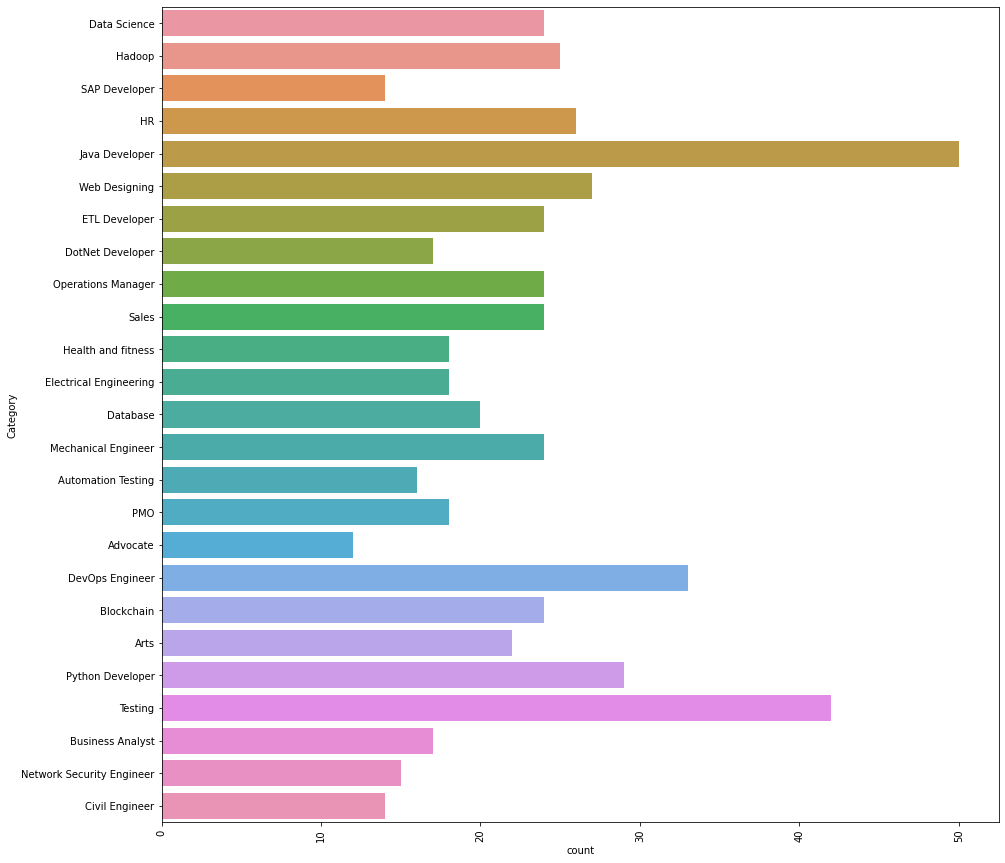

In [37]:
import seaborn as sns
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=resumeDataSet)

In [38]:
# to eliminate regular expression

import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [39]:
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))
print (resumeDataSet['cleaned_resume'][0])

Skills R Python SAP HANA Tableau SAP HANA SQL SAP HANA PAL MS SQL SAP Lumira C Linear Programming Data Modelling Advance Analytics SCM Analytics Retail Analytics Social Media Analytics NLP Education Details January 2017 to January 2018 PGDM Business Analytics Great Lakes Institute of Management Illinois Institute of Technology January 2013 Bachelor of Engineering Electronics and Communication Bengaluru Karnataka New Horizon College of Engineering Bangalore Visvesvaraya Technological University Data Science Consultant Consultant Deloitte USI Skill Details LINEAR PROGRAMMING Exprience 6 months RETAIL Exprience 6 months RETAIL MARKETING Exprience 6 months SCM Exprience 6 months SQL Exprience Less than 1 year months Deep Learning Exprience Less than 1 year months Machine learning Exprience Less than 1 year months Python Exprience Less than 1 year months R Exprience Less than 1 year monthsCompany Details company Deloitte USI description The project involved analysing historic deals and comi

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\munge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\munge\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Sentences : 
 Skills â¢ R â¢ Python â¢ SAP HANA â¢ Tableau â¢ SAP HANA SQL â¢ SAP HANA PAL â¢ MS SQL â¢ SAP Lumira â¢ C# â¢ Linear Programming â¢ Data Modelling â¢ Advance Analytics â¢ SCM Analytics â¢ Retail Analytics â¢Social Media Analytics â¢ NLP Education Details 
January 2017 to January 2018 PGDM Business Analytics  Great Lakes Institute of Management & Illinois Institute of Technology
January 2013 Bachelor of Engineering Electronics and Communication Bengaluru, Karnataka New Horizon College of Engineering, Bangalore Visvesvaraya Technological University
Data Science Consultant 

Consultant - Deloitte USI
Skill Details 
LINEAR PROGRAMMING- Exprience - 6 months
RETAIL- Exprience - 6 months
RETAIL MARKETING- Exprience - 6 months
SCM- Exprience - 6 months
SQL- Exprience - Less than 1 year months
Deep Learning- Exprience - Less than 1 year months
Machine learning- Exprience - Less than 1 year months
Python- Exprience - Less than 1 year months
R- Exprience - Less than 

wc :  <wordcloud.wordcloud.WordCloud object at 0x000001512B241668> 



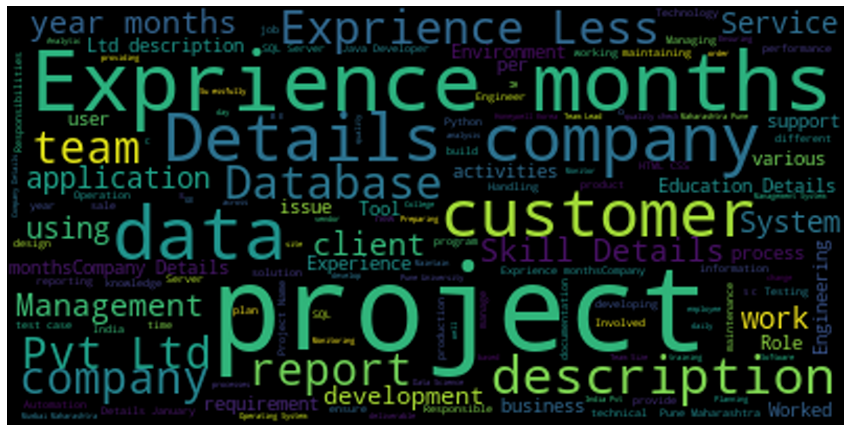

In [40]:
# !pip install nltk
# !pip install wordcloud
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resumeDataSet['Resume'].values
print('Sentences : \n',Sentences[0],'\n')
cleanedSentences = ""
for i in range(0,160):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print('mostcommon : ', mostcommon,'\n')
print('cleanedSentences : ', cleanedSentences,'\n')

wc = WordCloud().generate(cleanedSentences)
print('wc : ', wc,'\n')

plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='spline16') # bilinear
# 'antialiased', 'none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'spline36', 
# 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric', 'catrom', 'gaussian', 'bessel', 
# 'mitchell', 'sinc', 'lanczos', 'blackman'
plt.axis("off")
plt.show()

In [41]:
# Transform target variable using label encoding

from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])
print ("CONVERTED THE CATEGORICAL VARIABLES INTO NUMERICALS")
print('resumeDataSet : ')
resumeDataSet

CONVERTED THE CATEGORICAL VARIABLES INTO NUMERICALS
resumeDataSet : 


,Category,Resume,cleaned_resume
0,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
1,13,"Technical Skills Programming Languages: C, C++...",Technical Skills Programming Languages C C Jav...
2,21,Education Details \r\n\r\nSAP Technical Archit...,Education Details SAP Technical Architect SAP ...
3,12,Computer Knowledge: â¢ Proficient in basic us...,Computer Knowledge Proficient in basic use of ...
4,15,Technical Skills (Trained / Project Acquired S...,Technical Skills Trained Project Acquired Skil...
...,...,...,...
572,9,Education Details \r\nJanuary 2014 Education ...,Education Details January 2014 Education Detai...
573,3,Skills Strong CS fundamentals and problem solv...,Skills Strong CS fundamentals and problem solv...
574,15,"TECHNICAL SKILLS Skills: Java, SQL, PL/SQL, C,...",TECHNICAL SKILLS Skills Java SQL PL SQL C C Bo...
575,3,Hobbies â¢ Playing Chess â¢ Solving Rubik's ...,Hobbies Playing Chess Solving Rubik s Cube Wat...


In [42]:
resumeDataSet.to_csv('60p_resumeDataSet.csv', index=False)

In [43]:
# Text representation using TFIDF

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values
print('requiredText : ',requiredText,'\n')
print('requiredTarget : ',requiredTarget,'\n')

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)
print('WordFeatures : ',WordFeatures,'\n')

print ("Feature completed .....")


requiredText :  ['Skills R Python SAP HANA Tableau SAP HANA SQL SAP HANA PAL MS SQL SAP Lumira C Linear Programming Data Modelling Advance Analytics SCM Analytics Retail Analytics Social Media Analytics NLP Education Details January 2017 to January 2018 PGDM Business Analytics Great Lakes Institute of Management Illinois Institute of Technology January 2013 Bachelor of Engineering Electronics and Communication Bengaluru Karnataka New Horizon College of Engineering Bangalore Visvesvaraya Technological University Data Science Consultant Consultant Deloitte USI Skill Details LINEAR PROGRAMMING Exprience 6 months RETAIL Exprience 6 months RETAIL MARKETING Exprience 6 months SCM Exprience 6 months SQL Exprience Less than 1 year months Deep Learning Exprience Less than 1 year months Machine learning Exprience Less than 1 year months Python Exprience Less than 1 year months R Exprience Less than 1 year monthsCompany Details company Deloitte USI description The project involved analysing histo

WordFeatures :    (0, 1497)	0.06456648755719459
  (0, 1477)	0.026467620917802158
  (0, 1464)	0.045001423161104
  (0, 1458)	0.12165728682715667
  (0, 1457)	0.11059571996165495
  (0, 1451)	0.08125935788603927
  (0, 1447)	0.10718046193042984
  (0, 1442)	0.06364375137434497
  (0, 1441)	0.03630672936537484
  (0, 1440)	0.03060469759984084
  (0, 1427)	0.04634621854017718
  (0, 1425)	0.01879424871228416
  (0, 1419)	0.035410712377869705
  (0, 1418)	0.038888988957652415
  (0, 1414)	0.04438125151450958
  (0, 1411)	0.048269421460976035
  (0, 1397)	0.05107206438710611
  (0, 1391)	0.05055748901292358
  (0, 1384)	0.06368791229047145
  (0, 1378)	0.0476805068999382
  (0, 1371)	0.047463076303576164
  (0, 1369)	0.02710226377658205
  (0, 1361)	0.05624016017169846
  (0, 1360)	0.02399151386286435
  (0, 1356)	0.07263337092829873
  :	:
  (576, 169)	0.13721079605724995
  (576, 162)	0.15601993311684467
  (576, 158)	0.05518773430618357
  (576, 155)	0.04713906473898489
  (576, 153)	0.03833602215362571
  (576, 148

In [44]:
# Split the date

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2,stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)


(461, 1500)
(116, 1500)


In [45]:
clf = OneVsRestClassifier(RandomForestClassifier(n_estimators= 10, criterion="entropy"))
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

print('Accuracy of RandomForest Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of RandomForest Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))
#print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, prediction))

Accuracy of RandomForest Classifier on training set: 1.00
Accuracy of RandomForest Classifier on test set: 0.99

 Classification report for classifier OneVsRestClassifier(estimator=RandomForestClassifier(criterion='entropy',
                                                     n_estimators=10)):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         4
           8       1.00      0.86      0.92         7
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         4


In [46]:
# Save model
import pickle

# save the model to disk
filename = '60p_Resume_Classification_RFC.pkl'
pickle.dump(clf, open(filename, 'wb'))